# A recap on Scikit-learn's estimator interface

``X`` : data, 2d numpy array or scipy sparse matrix of shape (n_samples, n_features)

``y`` : targets, 1d numpy array of shape (n_samples,)

How do you choose the right estimator?

http://scikit-learn.org/stable/tutorial/machine_learning_map/

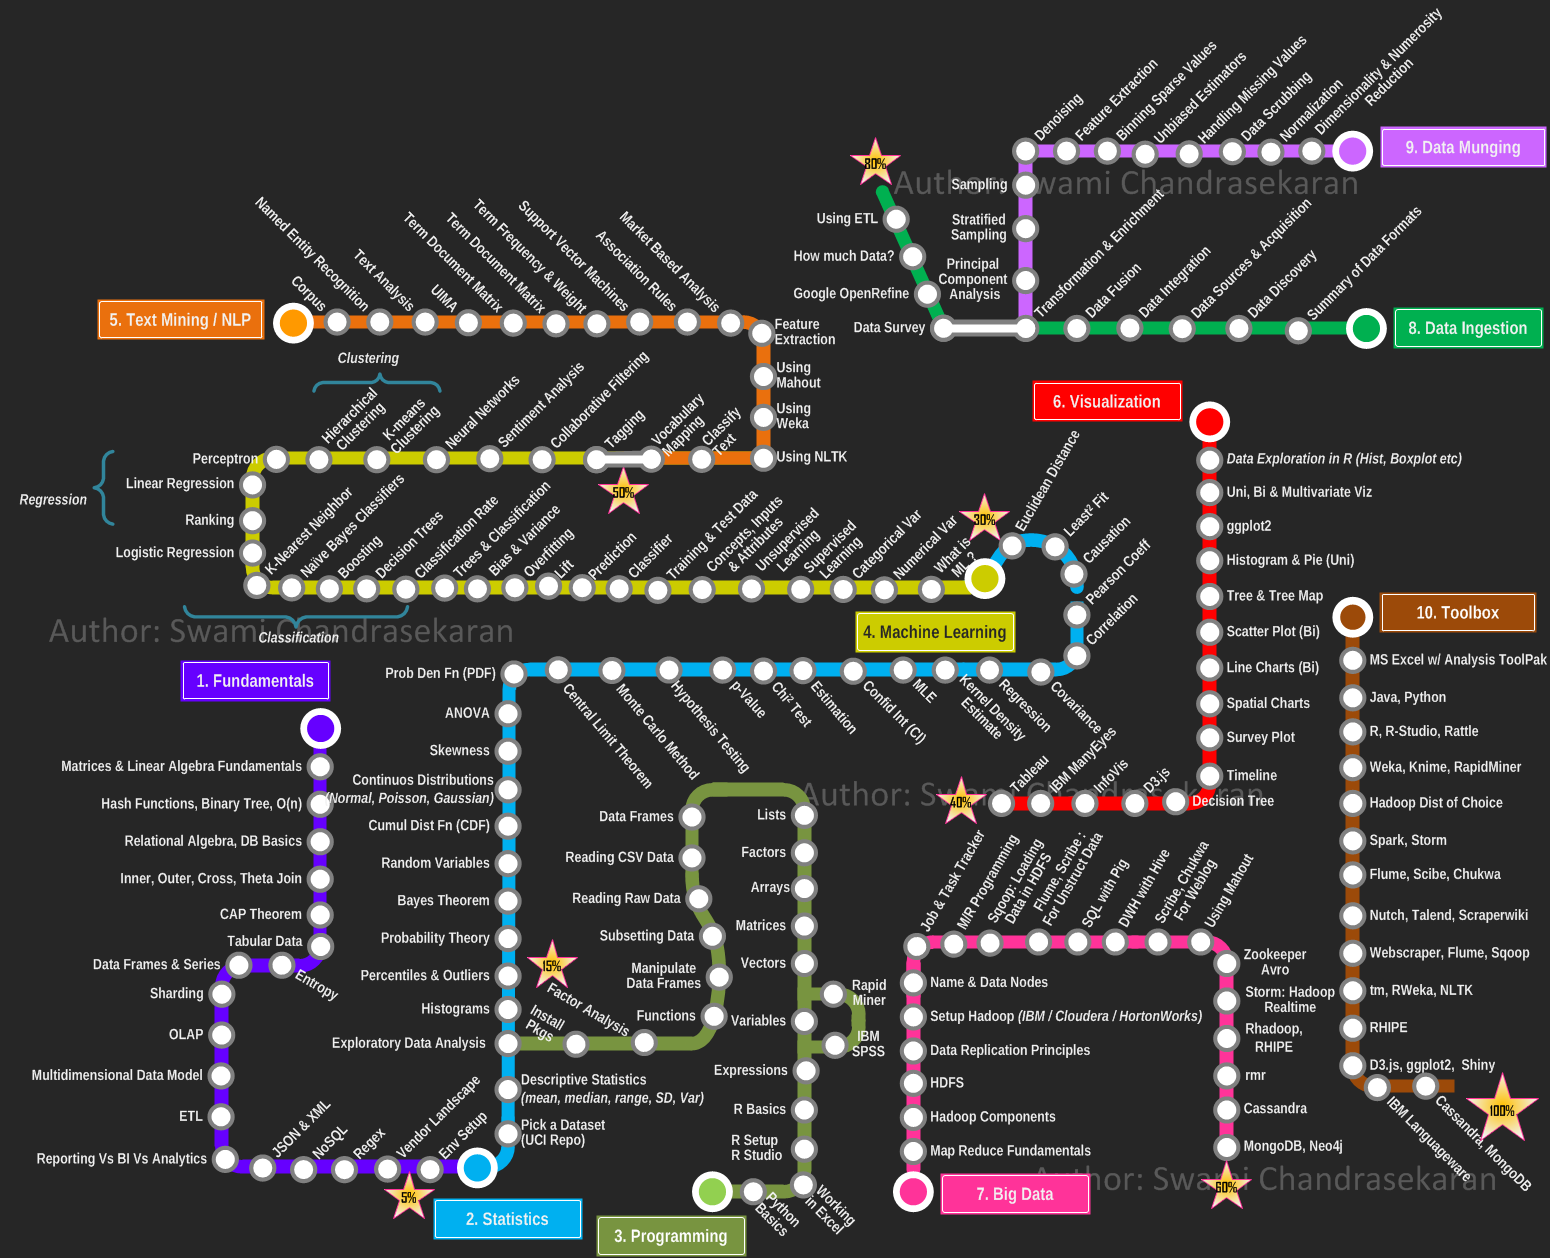

In [2]:
from IPython.display import Image
Image(filename='/Users/avd/Downloads/RoadToDataScientist1.png')

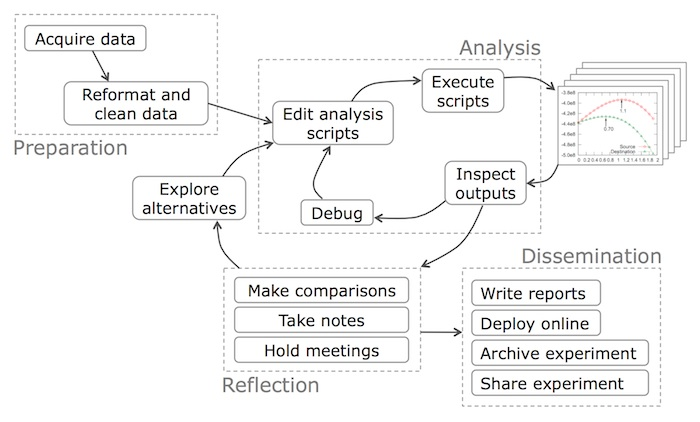

In [46]:
# http://cacm.acm.org/blogs/blog-cacm/169199-data-science-workflow-overview-and-challenges/fulltext

from IPython.display import Image
Image(filename='/Users/avd/Downloads/rp-overview.jpg')

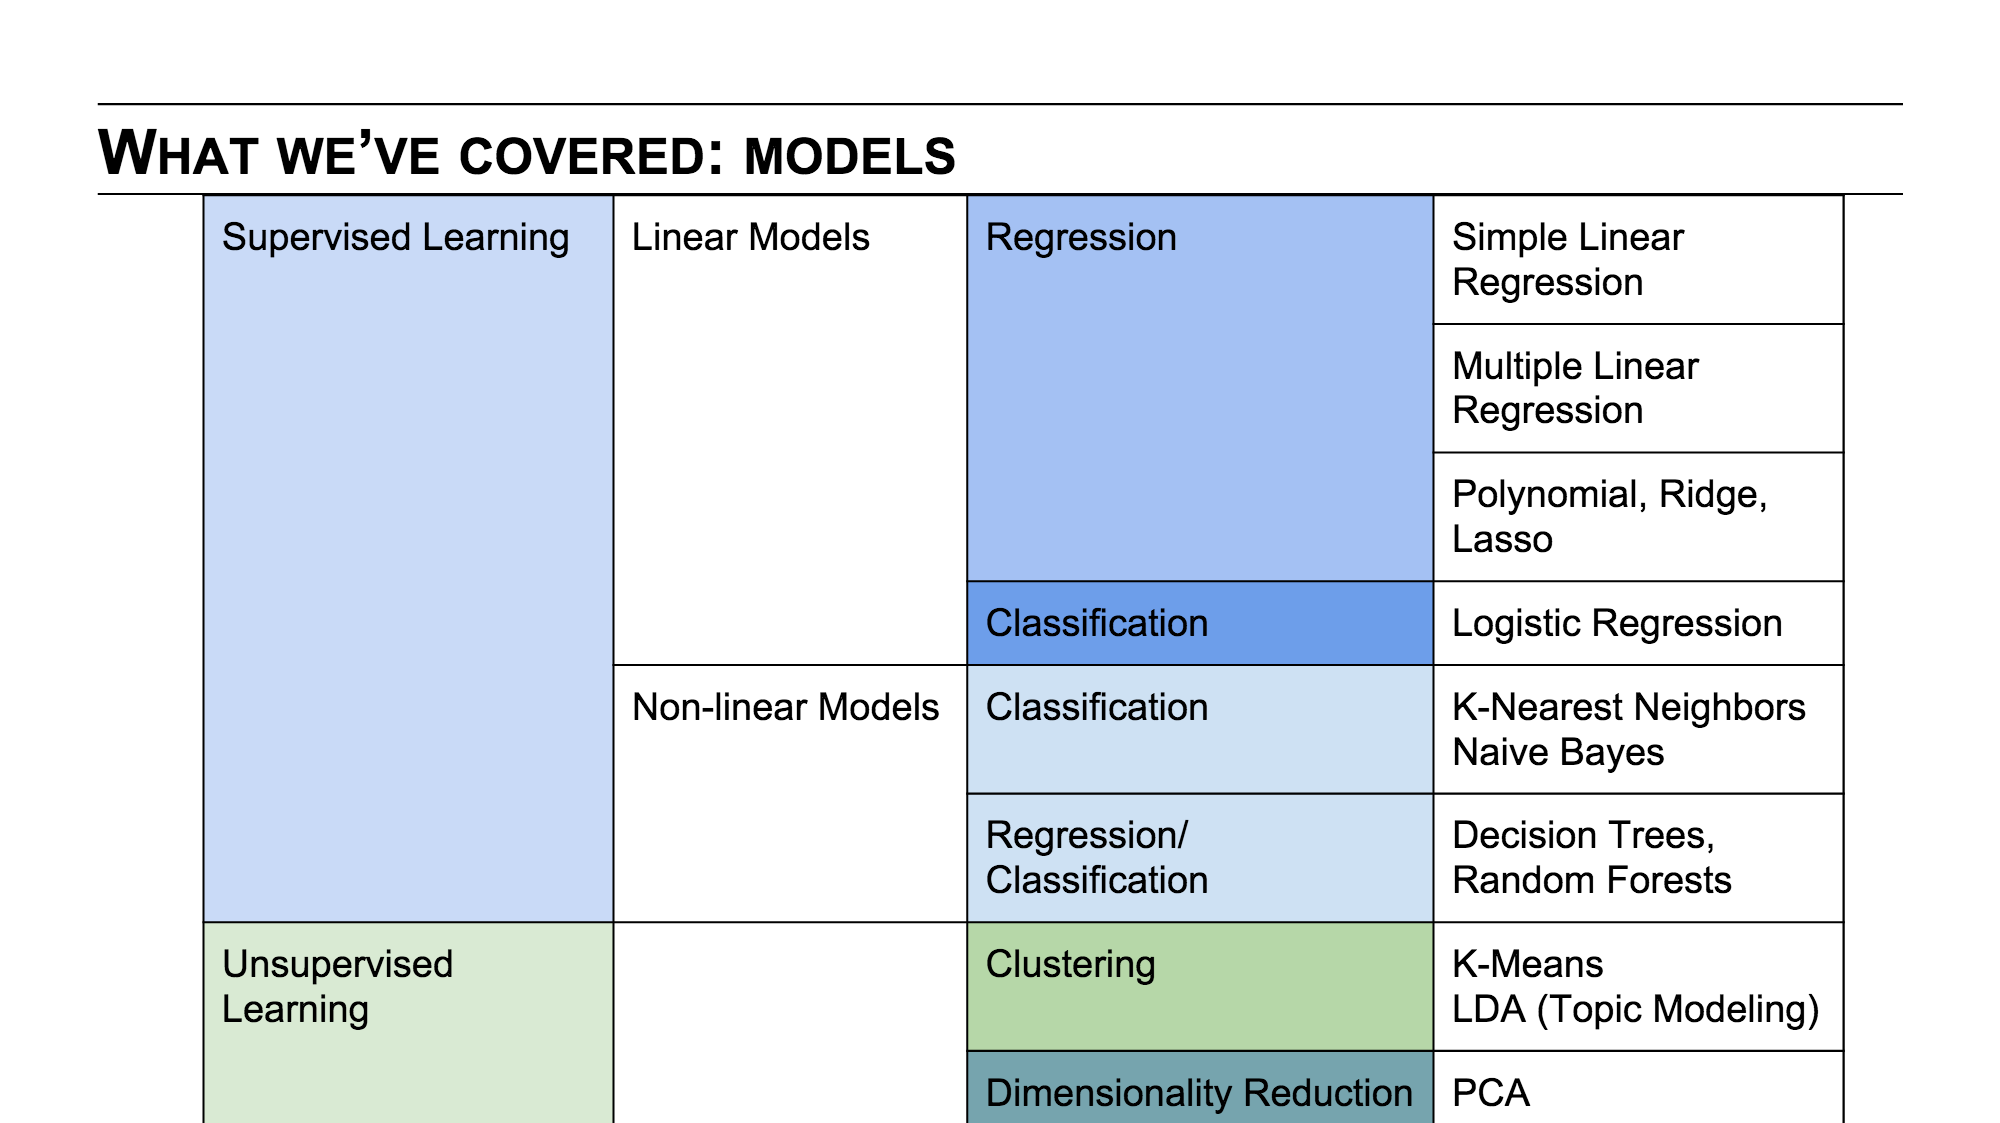

In [47]:
from IPython.display import Image
Image(filename='/Users/avd/Downloads/whatwelearned.png')

## Methods

<table>
<tr style="border:None; font-size:20px; padding:10px;"><th colspan=2>``model.fit(X_train, [y_train])``</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><th>``model.predict(X_test)``</th><th>``model.transform(X_test)``</th></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Classification</td><td>Preprocessing</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Regression</td><td>Dimensionality Reduction</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Clustering</td><td>Feature Extraction</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>&nbsp;</td><td>Feature selection</td></tr>
</table>

## Efficient methods for models that don't generalize
``model.fit_predict(X)`` (clustering)

``model.fit_transform(X)`` (manifold learning)

###Additional methods
__Model evaluation__ : ``score(X, [y])``

__Uncertainties from Classifiers__: ``decision_function(X)`` and ``predict_proba(X)``.

## Attributes
__Classifiers__: ``classes_``

__Clustering__: ``labels_``

__Manifold Learning__: ``embedding_``

__Linear models__: ``coef_``

__Linear Decompositions__: ``components_``

# Model Complexity, Overfitting and Underfitting

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

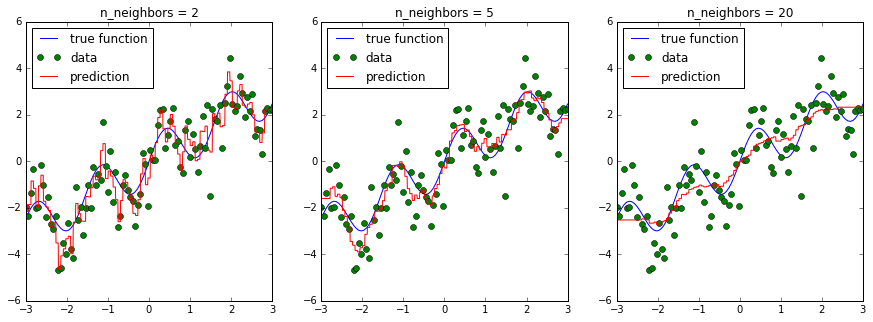

In [10]:
from figures import plot_kneighbors_regularization
plot_kneighbors_regularization()

![underfitting and overfitting](figures/overfitting_underfitting_cartoon.svg)

**bias–variance tradeoff** is the problem of simultaneously minimizing two sources of error that prevent supervised learning algorithms from generalizing beyond their training set:

```
According to Wiki:

The bias is error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

The variance is error from sensitivity to small fluctuations in the training set. High variance can cause overfitting: modeling the random noise in the training data, rather than the intended outputs.
```

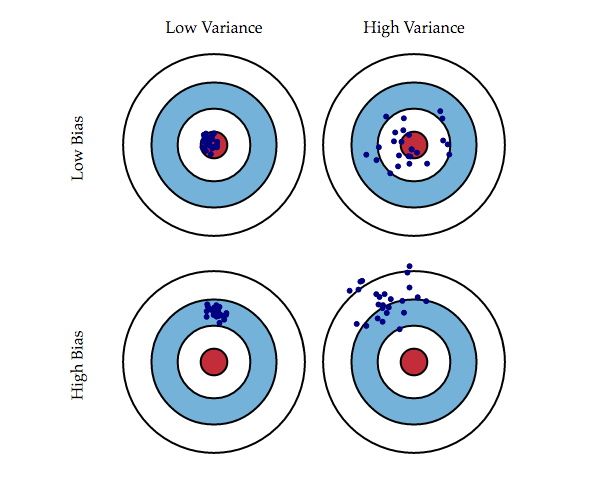

In [50]:
from IPython.display import Image
Image(filename='/Users/avd/Downloads/b vs v.png')

## Advice?
http://cs229.stanford.edu/materials/ML-advice.pdf

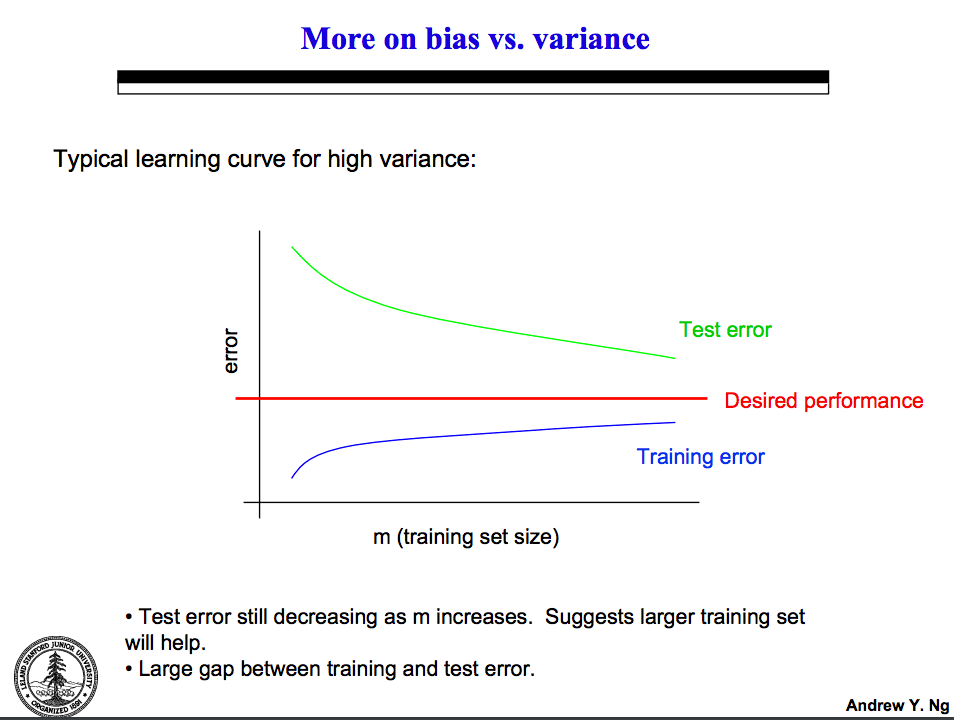

In [52]:
Image(filename='/Users/avd/Downloads/bVsvNg1.png')

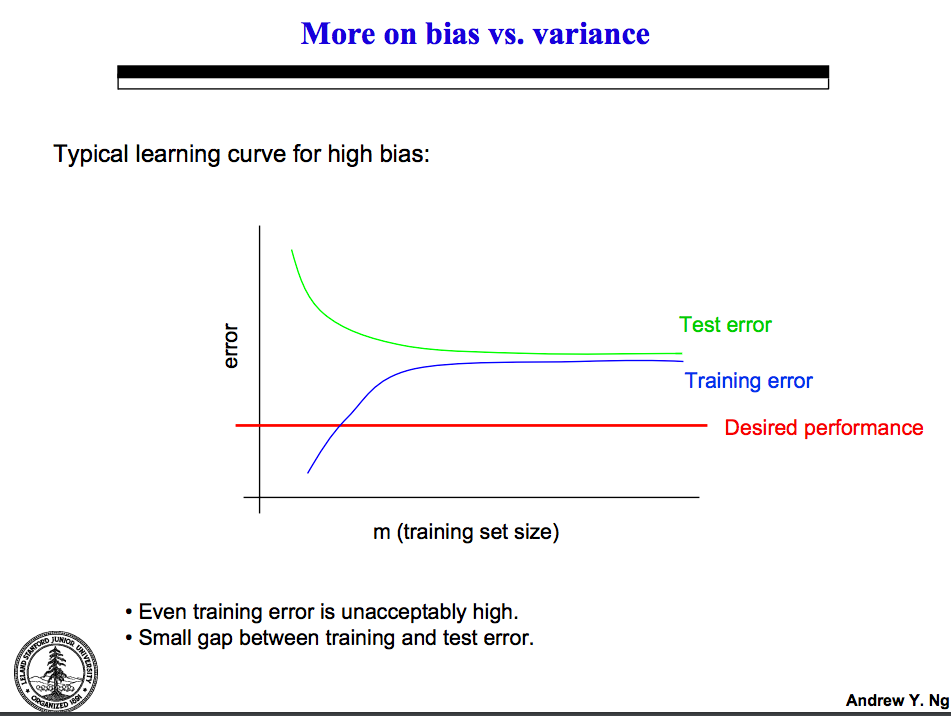

In [53]:
Image(filename='/Users/avd/Downloads/bVsvNg2.png')

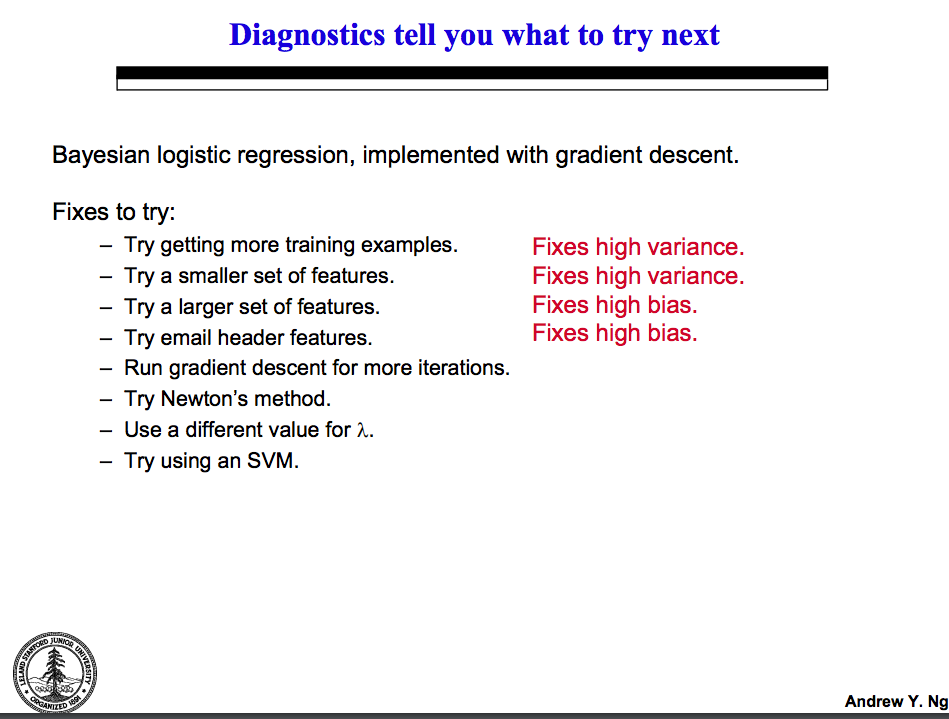

In [54]:
Image(filename='/Users/avd/Downloads/bVsvNg3.png')

Cross-Validation
=====================================

In [55]:
# Cross validation is a model evaluation method that is better than residuals. 
# The problem with residual evaluations is that they do not give an indication of 
# how well the learner will do when it is asked to make new predictions for data it has not already seen.

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [28]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = load_iris()
X, y = iris.data, iris.target
n_samples = X.shape[0]
print(X.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Validation with a training / test split

![train test split](train_test_split.svg)

In [19]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [44]:
# https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0

https://www.cs.cmu.edu/~schneide/tut5/node42.html

### Cross-validation for more robust estimates

![cross-validation](cross_validation.svg)

In [26]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)
print(np.mean(scores))

[ 0.98039216  0.98039216  1.        ]
0.986928104575


In [32]:
cross_val_score(classifier, X, y, cv=5)

array([ 0.96666667,  1.        ,  0.93333333,  0.96666667,  1.        ])

## Why train-test split when you can CV? Is there a way to get best of both worlds?

### Custom cross-validation iterators

In [29]:
from sklearn.cross_validation import KFold, StratifiedKFold, ShuffleSplit, LeavePLabelOut

In [30]:
cv = StratifiedKFold(iris.target, n_folds=5)
for train, test in cv:
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


In [31]:
def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks)

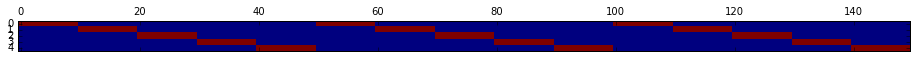

In [56]:
# The folds are made by preserving the percentage of samples for each class.
cv = StratifiedKFold(y, n_folds=5)
plot_cv(cv, n_samples)

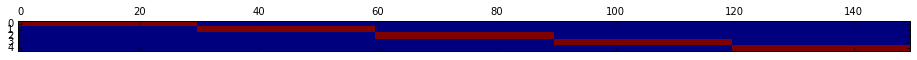

In [35]:
cv = KFold(n_samples, n_folds=5)
plot_cv(cv, n_samples)

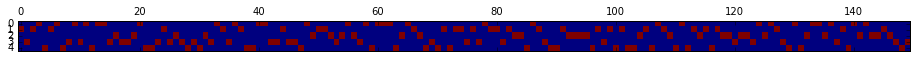

In [37]:
cv = KFold(n_samples, n_folds=5, shuffle=True)
plot_cv(cv, n_samples)

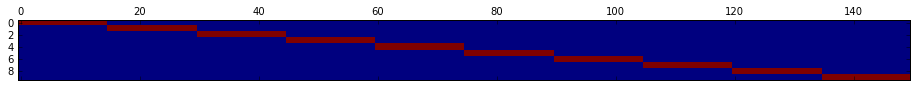

In [38]:
cv = KFold(n_samples, n_folds=10)
plot_cv(cv, n_samples)

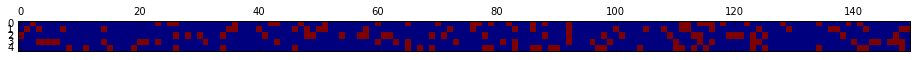

In [41]:
# Note: contrary to other cross-validation strategies, random splits do not guarantee that all folds will be different, 
# although this is still very likely for sizeable datasets.

# http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.ShuffleSplit.html
cv = ShuffleSplit(n_samples, n_iter=5, test_size=.2)
plot_cv(cv, n_samples)

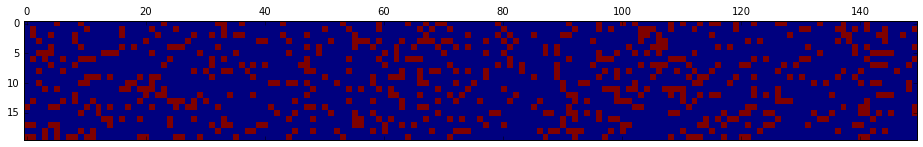

In [42]:
cv = ShuffleSplit(n_samples, n_iter=20, test_size=.2)
plot_cv(cv, n_samples)

In [43]:
cv = ShuffleSplit(n_samples, n_iter=5, test_size=.2)
cross_val_score(classifier, X, y, cv=cv)

array([ 0.96666667,  0.96666667,  0.93333333,  0.86666667,  0.93333333])